## OPENING A PYSPARK SESSION

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] =  '--jars /usr/share/java/mariadb-java-client.jar pyspark-shell'

In [5]:
import findspark
findspark.init()

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [7]:
from pyspark.sql.session import SparkSession
spark = SparkSession.builder\
.appName("artists recomendation")\
.getOrCreate()
print(f"This cluster relies on Spark '{spark.version}'")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


This cluster relies on Spark '3.2.1'


## IMPORTING TWITTER JSON DOCUMENTS FROM RELATED ARTISTS AND COMBINING THEM IN A SINGLE DF

We are going to import 5 json documents obtained from tweeter with the number of twits of the last 31 days. 

In [8]:
DF_6slack = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/6lack.json")

In [9]:
DF_6slack.printSchema()
print(f"This DataFrame has {DF_6slack.count()} rows")
type(DF_6slack)

root
 |-- end: string (nullable = true)
 |-- start: string (nullable = true)
 |-- tweet_count: long (nullable = true)

This DataFrame has 31 rows


pyspark.sql.dataframe.DataFrame

In [10]:
#here we create a column with the file_name from which we will extract the name of the related artist
from pyspark.sql.functions import input_file_name
DF_6slack_5=DF_6slack.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")

In [11]:
DF_6slack_5.limit(5).show()

+--------------------+-----------+--------------------+
|                 end|tweet_count|           file_name|
+--------------------+-----------+--------------------+
|2022-09-01T00:00:...|        272|hdfs://localhost:...|
|2022-09-02T00:00:...|        338|hdfs://localhost:...|
|2022-09-03T00:00:...|        309|hdfs://localhost:...|
|2022-09-04T00:00:...|        216|hdfs://localhost:...|
|2022-09-05T00:00:...|        206|hdfs://localhost:...|
+--------------------+-----------+--------------------+



In [12]:
from pyspark.sql.functions import split
DF_6slack_6=DF_6slack_5.withColumn('json', split(DF_6slack_5['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")

In [13]:
DF_6slack_6.limit(5).show()

+--------------------+-----------+----------+
|                 end|tweet_count|      json|
+--------------------+-----------+----------+
|2022-09-01T00:00:...|        272|6lack.json|
|2022-09-02T00:00:...|        338|6lack.json|
|2022-09-03T00:00:...|        309|6lack.json|
|2022-09-04T00:00:...|        216|6lack.json|
|2022-09-05T00:00:...|        206|6lack.json|
+--------------------+-----------+----------+



In [14]:
DF_6slack_7=DF_6slack_6.withColumn('artist', split(DF_6slack_6['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")

In [15]:
DF_6slack_7.limit(5).show()

+--------------------+-----------+------+
|                 end|tweet_count|artist|
+--------------------+-----------+------+
|2022-09-01T00:00:...|        272| 6lack|
|2022-09-02T00:00:...|        338| 6lack|
|2022-09-03T00:00:...|        309| 6lack|
|2022-09-04T00:00:...|        216| 6lack|
|2022-09-05T00:00:...|        206| 6lack|
+--------------------+-----------+------+



In [16]:
#The data we are interested in is the day the tweee_count and the artist

from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date

DF_6slack_8 = DF_6slack_7.withColumn("date",to_date("end"))\
.select("date", "tweet_count", "artist")
DF_6slack_8.limit(5).show()

+----------+-----------+------+
|      date|tweet_count|artist|
+----------+-----------+------+
|2022-09-01|        272| 6lack|
|2022-09-02|        338| 6lack|
|2022-09-03|        309| 6lack|
|2022-09-04|        216| 6lack|
|2022-09-05|        206| 6lack|
+----------+-----------+------+



In [17]:
#now we import the other 4 and we transform them the same way and we join it to previous one
bryson_tiller = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/bryson_tiller.json") 

In [18]:
bryson_tiller1=bryson_tiller.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
bryson_tiller2=bryson_tiller1.withColumn('json', split(bryson_tiller1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
bryson_tiller3=bryson_tiller2.withColumn('artist', split(bryson_tiller2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
bryson_tiller=bryson_tiller3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [19]:
brent_faiyaz = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/brent_faiyaz.json") 

In [20]:
brent_faiyaz1=brent_faiyaz.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
brent_faiyaz2=brent_faiyaz1.withColumn('json', split(brent_faiyaz1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
brent_faiyaz3=brent_faiyaz2.withColumn('artist', split(brent_faiyaz2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
brent_faiyaz=brent_faiyaz3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [21]:
majid_jordan = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/majid_jordan.json") 

In [22]:
majid_jordan1=majid_jordan.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
majid_jordan2=majid_jordan1.withColumn('json', split(majid_jordan1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
majid_jordan3=majid_jordan2.withColumn('artist', split(majid_jordan2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
majid_jordan=majid_jordan3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [23]:
partynextdoor = spark.read.json("hdfs://localhost:9000/datalake/raw/aggregate_tweetpy_queries/the_weeknd/partynextdoor.json") 

In [24]:
partynextdoor1=partynextdoor.withColumn("file_name",input_file_name()).select("end", "tweet_count", "file_name")
partynextdoor2=partynextdoor1.withColumn('json', split(partynextdoor1['file_name'], '/').getItem(7)).select("end", "tweet_count", "json")
partynextdoor3=partynextdoor2.withColumn('artist', split(partynextdoor2['json'], '.json').getItem(0)).select("end", "tweet_count", "artist")
partynextdoor=partynextdoor3.withColumn("date",to_date("end")).select("date", "tweet_count", "artist")

In [25]:
df_concat = DF_6slack_8.union(bryson_tiller).select("date", "tweet_count", "artist")
df_concat1 = df_concat.union(brent_faiyaz).select("date", "tweet_count", "artist")
df_concat2 = df_concat1.union(majid_jordan).select("date", "tweet_count", "artist")
df_concat = df_concat2.union(partynextdoor).select("date", "tweet_count", "artist")
df_concat.count()

155

In [26]:
df_concat.select(['artist']).groupby('artist').agg({'artist': 'count'}).show()

+-------------+-------------+
|       artist|count(artist)|
+-------------+-------------+
|        6lack|           31|
|bryson_tiller|           31|
| brent_faiyaz|           31|
| majid_jordan|           31|
|partynextdoor|           31|
+-------------+-------------+



## TIME SERIES WITH FB.PROPHET TO FORECAST FUTURE TWEETS

In [27]:
#!pip install fbprophet
#!pip install pyarrow = 0.15.1

In [28]:
#pip install prophet

In [29]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from prophet import Prophet
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

Importing plotly failed. Interactive plots will not work.


In [30]:
#Prophet expects date column to be called "ds" and target column as "y"

DF=df_concat.withColumnRenamed("date","ds").withColumnRenamed("tweet_count", "y").select("ds", "y", "artist")
DF.limit(5).show()
DF.dtypes

+----------+---+------+
|        ds|  y|artist|
+----------+---+------+
|2022-09-01|272| 6lack|
|2022-09-02|338| 6lack|
|2022-09-03|309| 6lack|
|2022-09-04|216| 6lack|
|2022-09-05|206| 6lack|
+----------+---+------+



[('ds', 'date'), ('y', 'bigint'), ('artist', 'string')]

In [31]:
#Now we start with the forecast

In [32]:
#Now we will create a Temporary view to run the SQL queries on the dataframe. After this, we run a SQL query to find the count of each artist 

DF.createOrReplaceTempView("tweets")
spark.sql("select artist, count(*) from tweets group by artist order by artist").show()

+-------------+--------+
|       artist|count(1)|
+-------------+--------+
|        6lack|      31|
| brent_faiyaz|      31|
|bryson_tiller|      31|
| majid_jordan|      31|
|partynextdoor|      31|
+-------------+--------+



In [33]:
sql = "SELECT artist, ds, sum(y) FROM tweets GROUP BY artist, ds ORDER BY artist, ds"
spark.sql(sql).show()

+------+----------+------+
|artist|        ds|sum(y)|
+------+----------+------+
| 6lack|2022-09-01|   272|
| 6lack|2022-09-02|   338|
| 6lack|2022-09-03|   309|
| 6lack|2022-09-04|   216|
| 6lack|2022-09-05|   206|
| 6lack|2022-09-06|   366|
| 6lack|2022-09-07|   323|
| 6lack|2022-09-08|   314|
| 6lack|2022-09-09|   575|
| 6lack|2022-09-10|  1262|
| 6lack|2022-09-11|  1307|
| 6lack|2022-09-12|   469|
| 6lack|2022-09-13|   332|
| 6lack|2022-09-14|   808|
| 6lack|2022-09-15|  1673|
| 6lack|2022-09-16|  1079|
| 6lack|2022-09-17|   751|
| 6lack|2022-09-18|   372|
| 6lack|2022-09-19|   330|
| 6lack|2022-09-20|  3171|
+------+----------+------+
only showing top 20 rows



In [34]:
#create a schema for our return object

from pyspark.sql.types import *
result_schema = StructType([
                  StructField('ds', TimestampType()),
                  StructField('artist', StringType()),
                  StructField('y', DoubleType()),
                  StructField('yhat', DoubleType()),
                  StructField('yhat_upper', DoubleType()),
                  StructField('yhat_lower', DoubleType())
])

#from the Pyspark SQL function we will import Pandas UDF and UDF type and define a function that will have facebook Prophet code

In [35]:
from pyspark.sql.functions import pandas_udf, PandasUDFType
@pandas_udf(result_schema, PandasUDFType.GROUPED_MAP)
def forecast_tweets(history_pd):

    # instantiate the model, configure the parameters
    model = Prophet(
        interval_width=0.95,
        growth='linear',
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=False,
        seasonality_mode='additive'
    )

    # fit the model
    model.fit(history_pd)

    # configure predictions
    future_pd = model.make_future_dataframe(
        periods=15,
        freq='d',
        include_history=True
    )

    # make predictions
    forecast_pd = model.predict(future_pd)

    
    f_pd = forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
    ra_pd = history_pd[['ds', 'artist', 'y']].set_index('ds')
    result_pd = f_pd.join(ra_pd, how='left')
    result_pd.reset_index(level=0, inplace=True)
    result_pd['artist'] = history_pd['artist'].iloc[0]
    return result_pd[['ds', 'artist', 'y', 'yhat', 'yhat_upper', 'yhat_lower']]

In [36]:
from pyspark.sql.functions import current_date
results = (DF.groupby('artist').apply(forecast_tweets).withColumn('training_date', current_date()))
results.cache()
results.show()

/opt/spark3/python/pyspark/sql/pandas/group_ops.py:81: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(
Importing plotly failed. Interactive plots will not work.======>  (19 + 1) / 20]
20:34:24 - cmdstanpy - INFO - Chain [1] start processing
20:34:24 - cmdstanpy - INFO - Chain [1] done processing


+-------------------+------------+----+------------------+------------------+--------------------+-------------+
|                 ds|      artist|   y|              yhat|        yhat_upper|          yhat_lower|training_date|
+-------------------+------------+----+------------------+------------------+--------------------+-------------+
|2022-09-01 00:00:00|majid_jordan|27.0|15.065815999999105| 30.54023673577074|-0.39826431325097705|   2022-11-03|
|2022-09-02 00:00:00|majid_jordan|40.0|16.867879173772614| 32.75120581430761|  2.1687422834595345|   2022-11-03|
|2022-09-03 00:00:00|majid_jordan| 8.0|13.867583335228092|29.019246840022866| -0.9722349068000318|   2022-11-03|
|2022-09-04 00:00:00|majid_jordan|14.0|12.443610737564997| 28.14399248916023|  -2.750770509265967|   2022-11-03|
|2022-09-05 00:00:00|majid_jordan| 8.0| 6.942393573631881|23.566607135594772|  -8.276809486972704|   2022-11-03|
|2022-09-06 00:00:00|majid_jordan| 7.0| 9.444751710202887| 24.91087809022711|  -5.65560710110865

In [37]:
results.count()

20:34:25 - cmdstanpy - INFO - Chain [1] start processing
20:34:25 - cmdstanpy - INFO - Chain [1] done processing
20:34:25 - cmdstanpy - INFO - Chain [1] start processing         (25 + 2) / 200]
20:34:25 - cmdstanpy - INFO - Chain [1] done processing          (26 + 2) / 200]
Importing plotly failed. Interactive plots will not work.        (27 + 2) / 200]
20:34:26 - cmdstanpy - INFO - Chain [1] start processing
20:34:26 - cmdstanpy - INFO - Chain [1] start processing
20:34:26 - cmdstanpy - INFO - Chain [1] done processing
20:34:26 - cmdstanpy - INFO - Chain [1] done processing


230

Verifying that the 15 forecasted days are in the DF 

In [38]:
results.createOrReplaceTempView('forecasted')
spark.sql("SELECT artist, count(*) FROM  forecasted GROUP BY artist").show()

+-------------+--------+
|       artist|count(1)|
+-------------+--------+
| majid_jordan|      46|
| brent_faiyaz|      46|
|        6lack|      46|
|partynextdoor|      46|
|bryson_tiller|      46|
+-------------+--------+



In [39]:
results.dtypes

[('ds', 'timestamp'),
 ('artist', 'string'),
 ('y', 'double'),
 ('yhat', 'double'),
 ('yhat_upper', 'double'),
 ('yhat_lower', 'double'),
 ('training_date', 'date')]

In [40]:
results.printSchema()

root
 |-- ds: timestamp (nullable = true)
 |-- artist: string (nullable = true)
 |-- y: double (nullable = true)
 |-- yhat: double (nullable = true)
 |-- yhat_upper: double (nullable = true)
 |-- yhat_lower: double (nullable = true)
 |-- training_date: date (nullable = false)



converting DF to pandas just for provisional visualization of results

In [41]:
final_df = results.toPandas()

In [42]:
final_df

,ds,artist,y,yhat,yhat_upper,yhat_lower,training_date
0,2022-09-01,majid_jordan,27.0,15.065816,30.540237,-0.398264,2022-11-03
1,2022-09-02,majid_jordan,40.0,16.867879,32.751206,2.168742,2022-11-03
2,2022-09-03,majid_jordan,8.0,13.867583,29.019247,-0.972235,2022-11-03
3,2022-09-04,majid_jordan,14.0,12.443611,28.143992,-2.750771,2022-11-03
4,2022-09-05,majid_jordan,8.0,6.942394,23.566607,-8.276809,2022-11-03
...,...,...,...,...,...,...,...
225,2022-10-12,bryson_tiller,NaN,296.783025,1083.104361,-585.511587,2022-11-03
226,2022-10-13,bryson_tiller,NaN,473.874017,1312.728849,-354.124109,2022-11-03
227,2022-10-14,bryson_tiller,NaN,505.478568,1323.498389,-344.444256,2022-11-03
228,2022-10-15,bryson_tiller,NaN,762.865054,1683.002732,-111.284502,2022-11-03


In [43]:
#If we want to see the whole DF
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(final_df)

Plotting original data

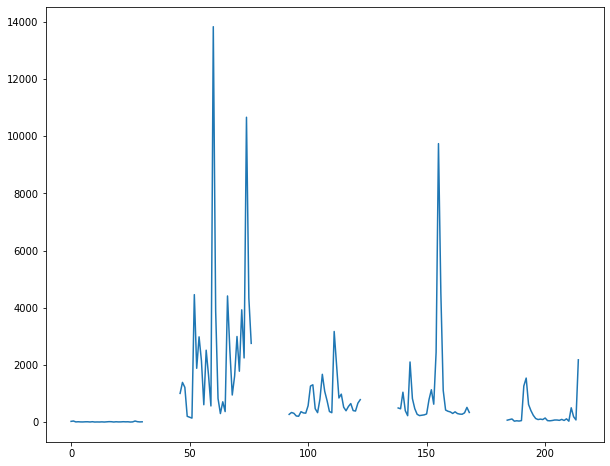

In [44]:
y1 = final_df.iloc[:,2]
plt.plot(y1)
plt.show()

plotting the forecasted data

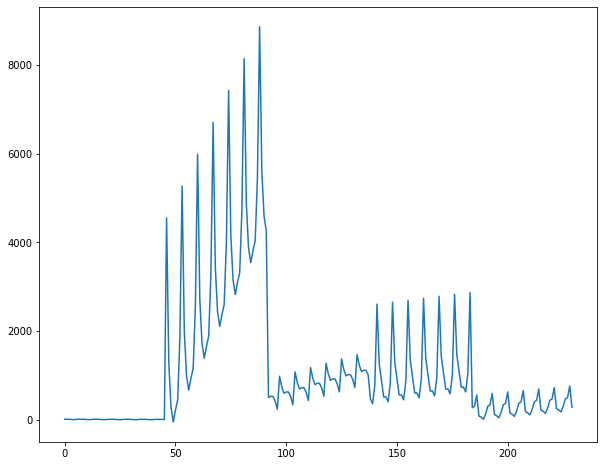

In [45]:
y2 = final_df.iloc[:,3]
plt.plot(y2)
plt.show()

## EXPORTING RESULTS TO THE SERVING LAYER (MARIADB) AS A MYSQL DB

In [46]:
results.limit(5).show()

+-------------------+------------+----+------------------+------------------+--------------------+-------------+
|                 ds|      artist|   y|              yhat|        yhat_upper|          yhat_lower|training_date|
+-------------------+------------+----+------------------+------------------+--------------------+-------------+
|2022-09-01 00:00:00|majid_jordan|27.0|15.065815999999105| 30.54023673577074|-0.39826431325097705|   2022-11-03|
|2022-09-02 00:00:00|majid_jordan|40.0|16.867879173772614| 32.75120581430761|  2.1687422834595345|   2022-11-03|
|2022-09-03 00:00:00|majid_jordan| 8.0|13.867583335228092|29.019246840022866| -0.9722349068000318|   2022-11-03|
|2022-09-04 00:00:00|majid_jordan|14.0|12.443610737564997| 28.14399248916023|  -2.750770509265967|   2022-11-03|
|2022-09-05 00:00:00|majid_jordan| 8.0| 6.942393573631881|23.566607135594772|  -8.276809486972704|   2022-11-03|
+-------------------+------------+----+------------------+------------------+-------------------

In [104]:
#reshaping the result before sending it to the serving layer

from pyspark.sql.functions import date_format
from pyspark.sql.functions import to_date

results_mdb = results.withColumn("dates",to_date("ds"))\
.select("dates", "artist", "y", "yhat")
results_mdb.limit(5).show()

+----------+------------+----+------------------+
|     dates|      artist|   y|              yhat|
+----------+------------+----+------------------+
|2022-09-01|majid_jordan|27.0|15.065815999999105|
|2022-09-02|majid_jordan|40.0|16.867879173772614|
|2022-09-03|majid_jordan| 8.0|13.867583335228092|
|2022-09-04|majid_jordan|14.0|12.443610737564997|
|2022-09-05|majid_jordan| 8.0| 6.942393573631881|
+----------+------------+----+------------------+



In [105]:
results_mdb.printSchema()

root
 |-- dates: date (nullable = true)
 |-- artist: string (nullable = true)
 |-- y: double (nullable = true)
 |-- yhat: double (nullable = true)



In [106]:
results_mdb2 = results_mdb.withColumn("tweets", results_mdb.y.cast('integer'))

In [107]:
results_mdb3 = results_mdb2.withColumn("forecasted_tweets", results_mdb.yhat.cast('integer'))

In [108]:
results_mdb=results_mdb3.select("dates", "artist", "tweets", "forecasted_tweets")

In [109]:
results_mdb.printSchema()

root
 |-- dates: date (nullable = true)
 |-- artist: string (nullable = true)
 |-- tweets: integer (nullable = true)
 |-- forecasted_tweets: integer (nullable = true)



In [110]:
results_mdb.limit(5).show()

+----------+------------+------+-----------------+
|     dates|      artist|tweets|forecasted_tweets|
+----------+------------+------+-----------------+
|2022-09-01|majid_jordan|    27|               15|
|2022-09-02|majid_jordan|    40|               16|
|2022-09-03|majid_jordan|     8|               13|
|2022-09-04|majid_jordan|    14|               12|
|2022-09-05|majid_jordan|     8|                6|
+----------+------------+------+-----------------+



In [111]:
from pyspark.sql.functions import when
results_mdb = results_mdb.withColumn("hist_forecast", when(results_mdb.tweets.isNull(), results_mdb.forecasted_tweets)
                                  .otherwise(results_mdb.tweets))

In [112]:
results_mdb.show(20)

+----------+------------+------+-----------------+-------------+
|     dates|      artist|tweets|forecasted_tweets|hist_forecast|
+----------+------------+------+-----------------+-------------+
|2022-09-01|majid_jordan|    27|               15|           27|
|2022-09-02|majid_jordan|    40|               16|           40|
|2022-09-03|majid_jordan|     8|               13|            8|
|2022-09-04|majid_jordan|    14|               12|           14|
|2022-09-05|majid_jordan|     8|                6|            8|
|2022-09-06|majid_jordan|     7|                9|            7|
|2022-09-07|majid_jordan|    12|               18|           12|
|2022-09-08|majid_jordan|    13|               14|           13|
|2022-09-09|majid_jordan|     6|               16|            6|
|2022-09-10|majid_jordan|    15|               13|           15|
|2022-09-11|majid_jordan|     4|               11|            4|
|2022-09-12|majid_jordan|     7|                6|            7|
|2022-09-13|majid_jordan|

In [113]:
results_mdb.printSchema()

root
 |-- dates: date (nullable = true)
 |-- artist: string (nullable = true)
 |-- tweets: integer (nullable = true)
 |-- forecasted_tweets: integer (nullable = true)
 |-- hist_forecast: integer (nullable = true)



In [120]:
results_mdb.filter(col("hist_forecast").isNull()).show()

+-----+------+------+-----------------+-------------+
|dates|artist|tweets|forecasted_tweets|hist_forecast|
+-----+------+------+-----------------+-------------+
+-----+------+------+-----------------+-------------+



In [116]:
url = "jdbc:mysql://localhost:3306/relatedartists"
table = "Forecast"
mode = "overwrite"
props = {"user":"osbdet",
         "password":"osbdet123$", 
         "driver":"org.mariadb.jdbc.Driver"}

In [117]:
results_mdb.write.jdbc(url,table,mode,props)